In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [72]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 126MB/s] 


In [73]:
dt=pd.read_csv('walmart_data.csv?1641285094')

In [74]:
#Shape of the data
dt.shape

(550068, 10)

In [75]:
dt.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [76]:
#statistical summary
dt.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [77]:
#data types of all attributes
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [78]:
#1 Conversion of categorical attributes to category
dt['Gender'] = dt['Gender'].map({'F':1, 'M':0})

In [79]:
dt['Age'] = dt['Age'].map({'0-17':1, '18-25':2, '26-35':3 , '36-45':4 , '46-50':5 , '51-55':6 , '55+':7 })

In [80]:
dt['City_Category'] = dt['City_Category'].map({'A':1, 'B':2, 'C':3})

In [81]:
dt['Stay_In_Current_City_Years'] = dt['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+':5})

In [82]:
dt["Product_ID"] = dt["Product_ID"].astype('category')
dt["Product_ID_N"] = dt["Product_ID"].cat.codes

In [83]:
#2 Value counts and unique attributes

In [84]:
##dt.apply(pd.Series.value_counts) can be done get all value counts at once but the description isn't that clear
dt['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [85]:
dt['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1
Name: Product_ID, Length: 3631, dtype: int64

In [86]:
dt['Gender'].value_counts()

0    414259
1    135809
Name: Gender, dtype: int64

In [87]:
dt['Age'].value_counts()

3    219587
4    110013
2     99660
5     45701
6     38501
7     21504
1     15102
Name: Age, dtype: int64

In [88]:
dt['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [89]:
dt['City_Category'].value_counts()

2    231173
3    171175
1    147720
Name: City_Category, dtype: int64

In [90]:
dt['Stay_In_Current_City_Years'].value_counts()

1    193821
2    101838
3     95285
5     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

In [91]:
dt['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [92]:
dt['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [93]:
dt['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [94]:
#uniquye attributes
dt.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
Product_ID_N                   3631
dtype: int64

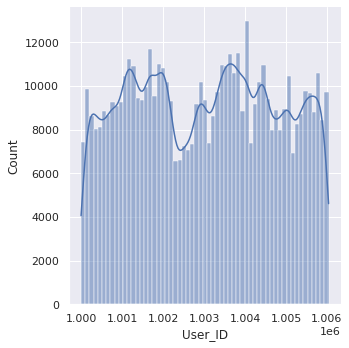

In [95]:
#Visual analysis
#Univariate Analysis
#User_Id
sns.displot(dt.User_ID, bins = 59, kde= True)

<AxesSubplot:xlabel='User_ID', ylabel='count'>

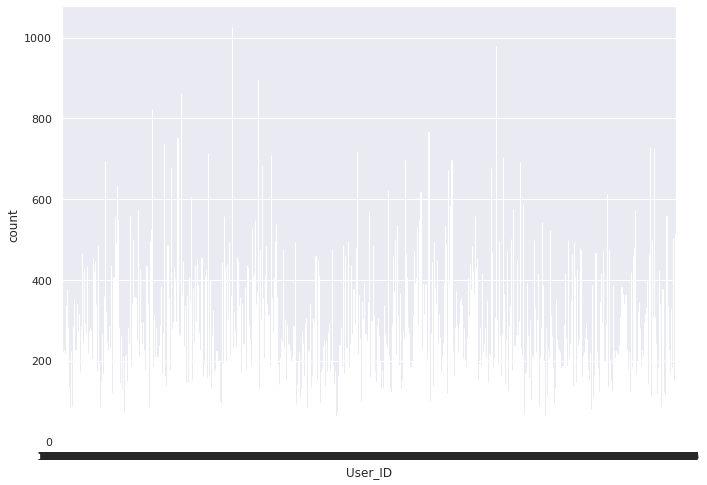

In [96]:
sns.countplot(x= 'User_ID', data = dt, saturation = 2)

<AxesSubplot:xlabel='User_ID', ylabel='Count'>

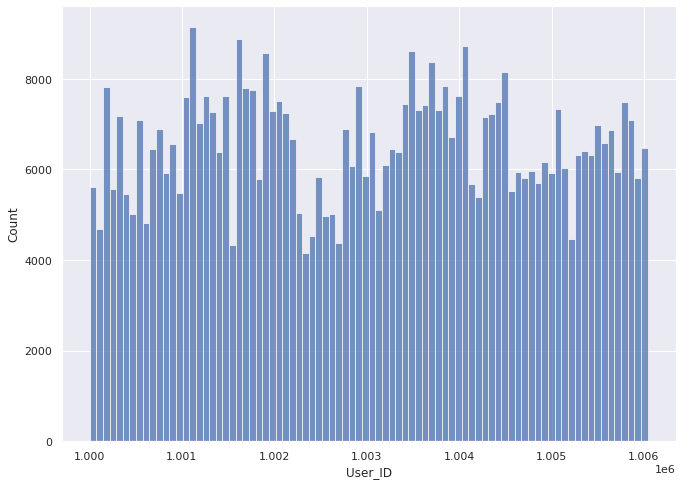

In [97]:
sns.histplot(data = dt, x = 'User_ID')

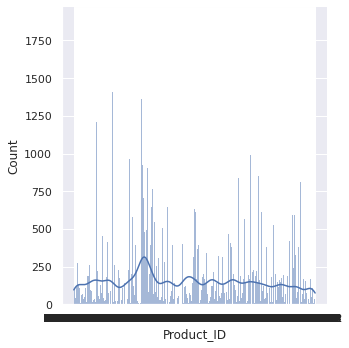

In [98]:
#Product_ID
sns.displot(dt.Product_ID, kde= True)

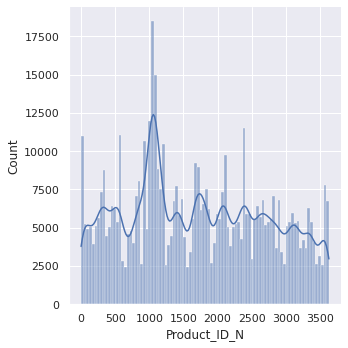

In [99]:
sns.displot(dt.Product_ID_N, kde= True)

In [ ]:
sns.countplot(x= 'Product_ID', data = dt, saturation = 2)

<AxesSubplot:xlabel='Product_ID', ylabel='count'>

<AxesSubplot:xlabel='Product_ID', ylabel='Count'>

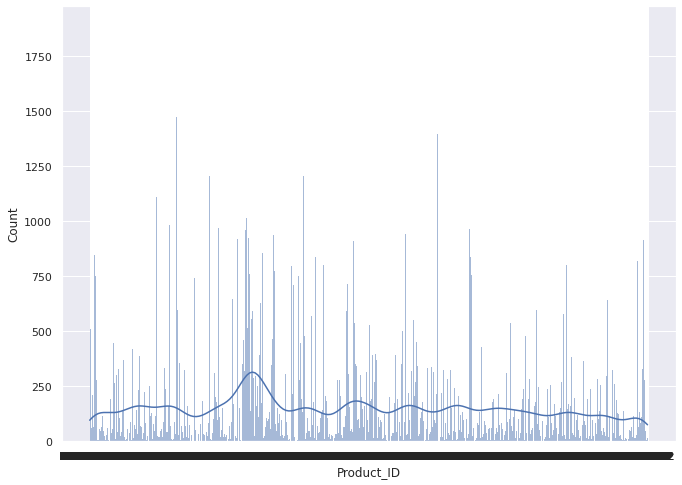

In [101]:
sns.histplot(data = dt, x = 'Product_ID', kde = True)

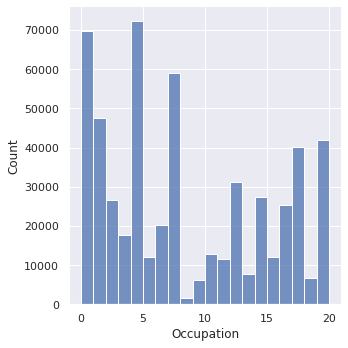

In [102]:
#There are 21 types of Occupations hence I am considering it a continous variable. It can be considered a category
#variable as well
sns.displot(dt.Occupation, bins = 20)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

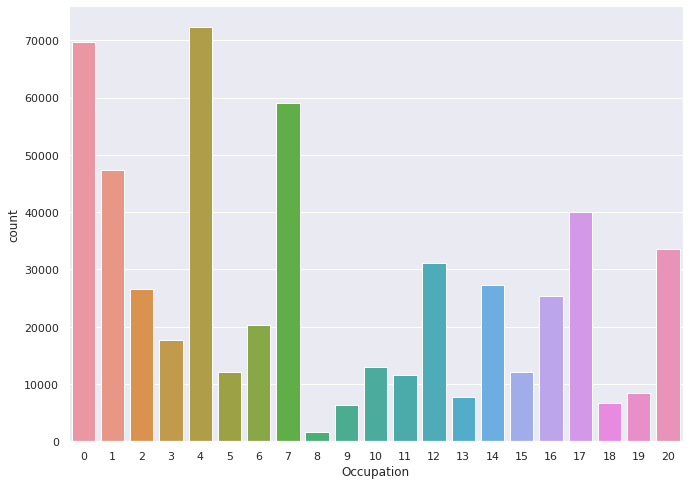

In [103]:
sns.countplot(x= 'Occupation', data = dt)

<AxesSubplot:xlabel='Occupation', ylabel='Count'>

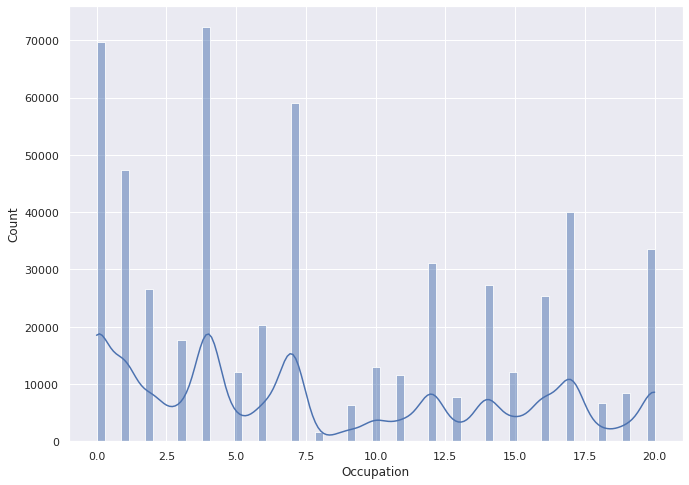

In [104]:
sns.histplot(data = dt, x = 'Occupation', kde = True)

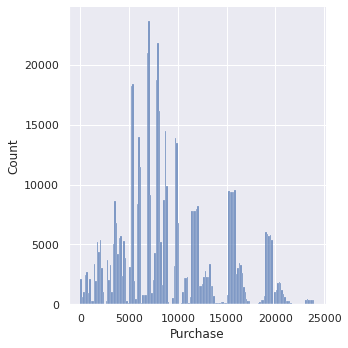

In [105]:
#Purchase
sns.displot(dt.Purchase)

<AxesSubplot:xlabel='Purchase', ylabel='count'>

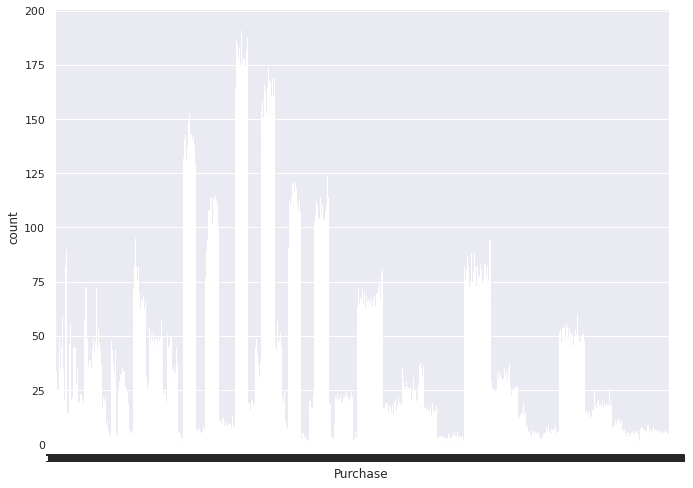

In [199]:
sns.countplot(x= 'Purchase', data = dt)

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

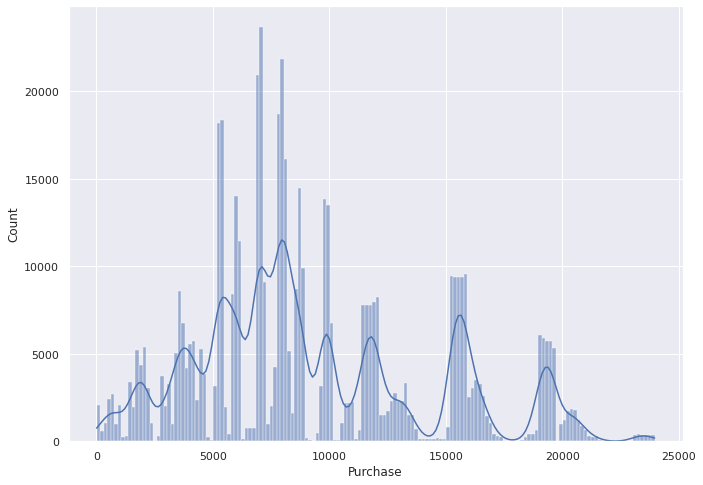

In [107]:
sns.histplot(data = dt, x = 'Purchase', kde = True)

In [108]:
#Categorical variable
#Gender. Although a category varialbe no point plotting its box plot. Value_counts() gives us all the info

<AxesSubplot:ylabel='Product_Category'>

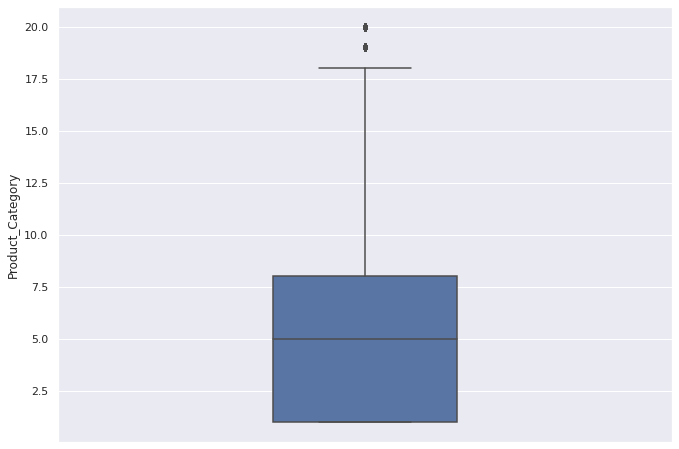

In [109]:
sns.boxplot( y =dt['Product_Category'], width = 0.3)

<AxesSubplot:ylabel='Age'>

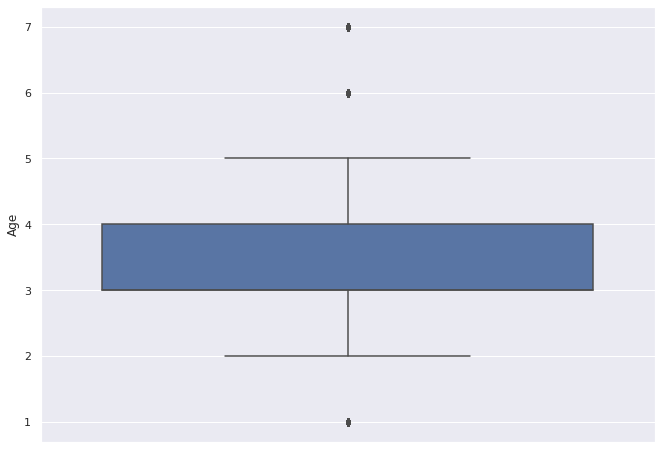

In [110]:
sns.boxplot( y =dt['Age'])

<AxesSubplot:ylabel='Occupation'>

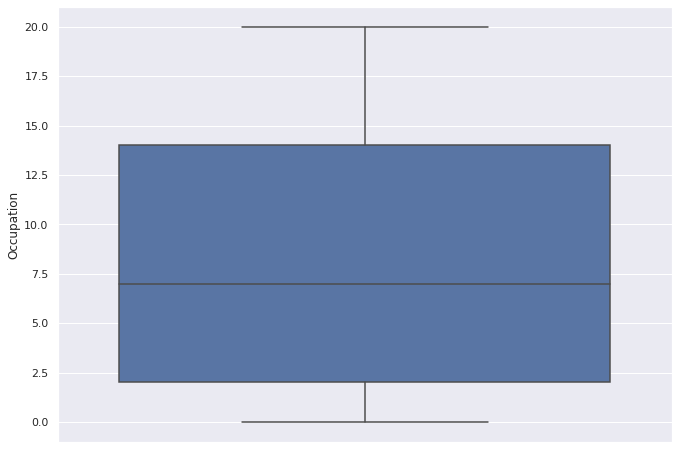

In [111]:
sns.boxplot( y =dt['Occupation'])

<AxesSubplot:ylabel='City_Category'>

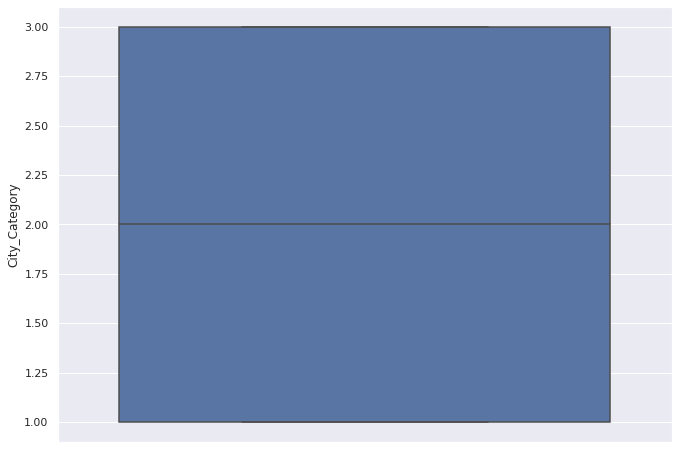

In [112]:
sns.boxplot( y =dt['City_Category'])

<AxesSubplot:ylabel='Stay_In_Current_City_Years'>

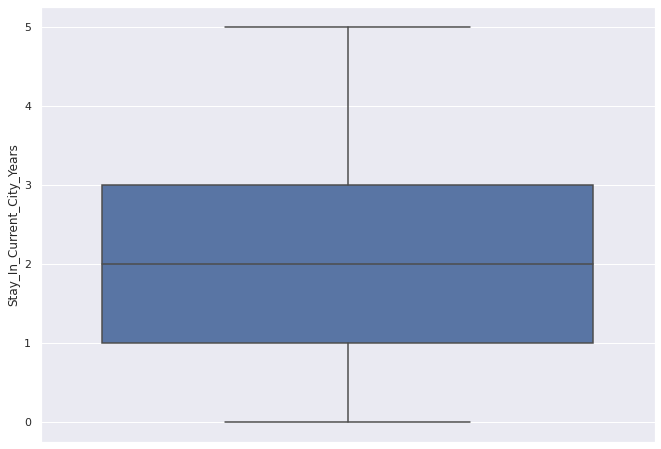

In [113]:
sns.boxplot( y =dt['Stay_In_Current_City_Years'])

<AxesSubplot:ylabel='Product_Category'>

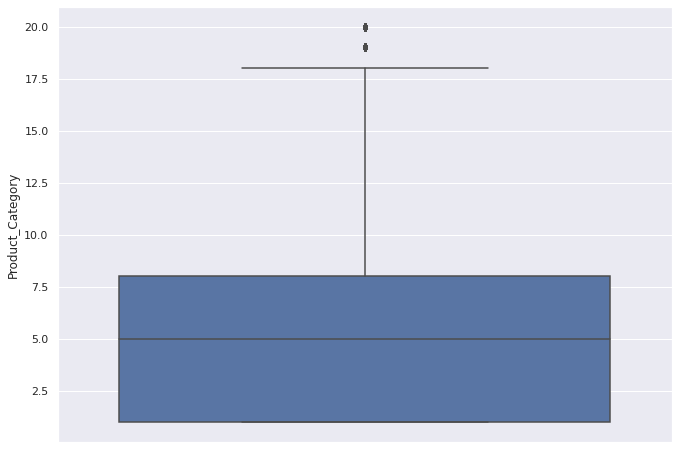

In [114]:
sns.boxplot( y =dt['Product_Category'])

<AxesSubplot:>

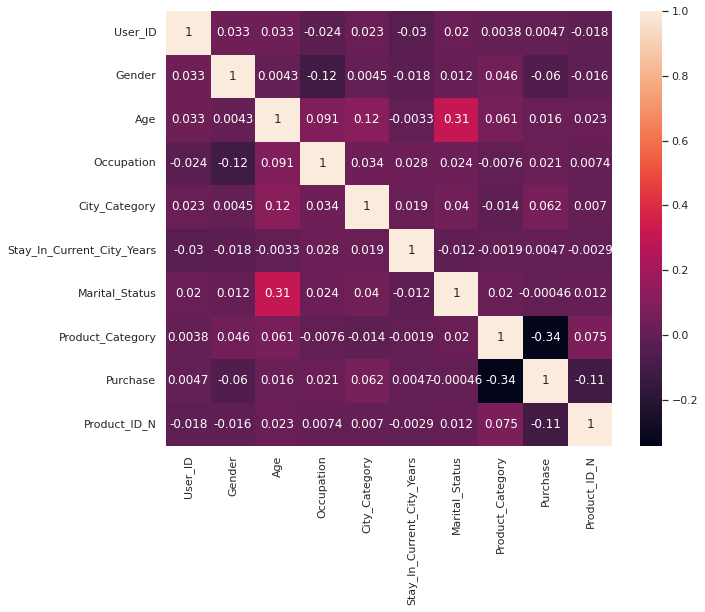

In [115]:
#Correlation heatmaps and pairplots
#heatmap
Var_Corr = dt.corr()
sns.set (rc = {'figure.figsize':(10, 8)})
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

<AxesSubplot:xlabel='Occupation', ylabel='Age'>

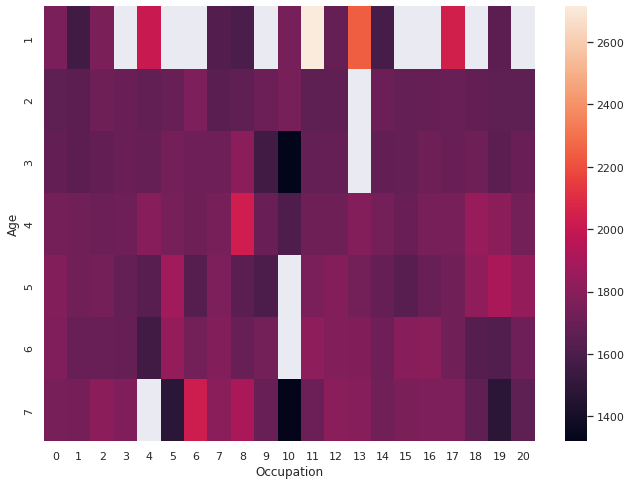

In [116]:
tb1 = pd.pivot_table(dt, values = 'Product_ID_N', index = 'Age', columns = 'Occupation')
sns.set (rc = {'figure.figsize':(11, 8)})
sns.heatmap(tb1)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Age'>

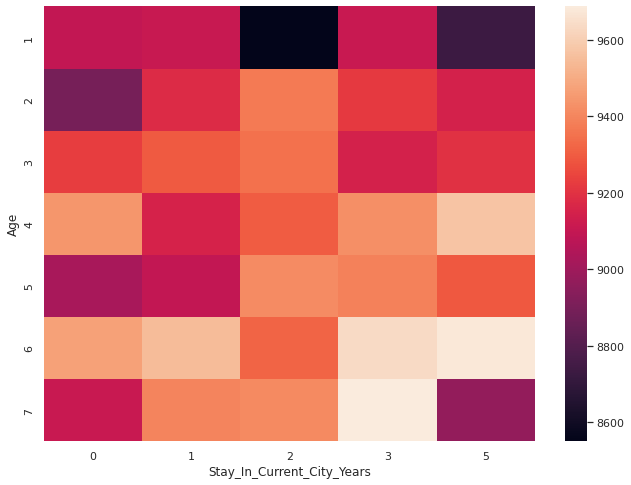

In [117]:
tb1 = pd.pivot_table(dt, values = 'Purchase', index = 'Age', columns = 'Stay_In_Current_City_Years')
sns.heatmap(tb1)

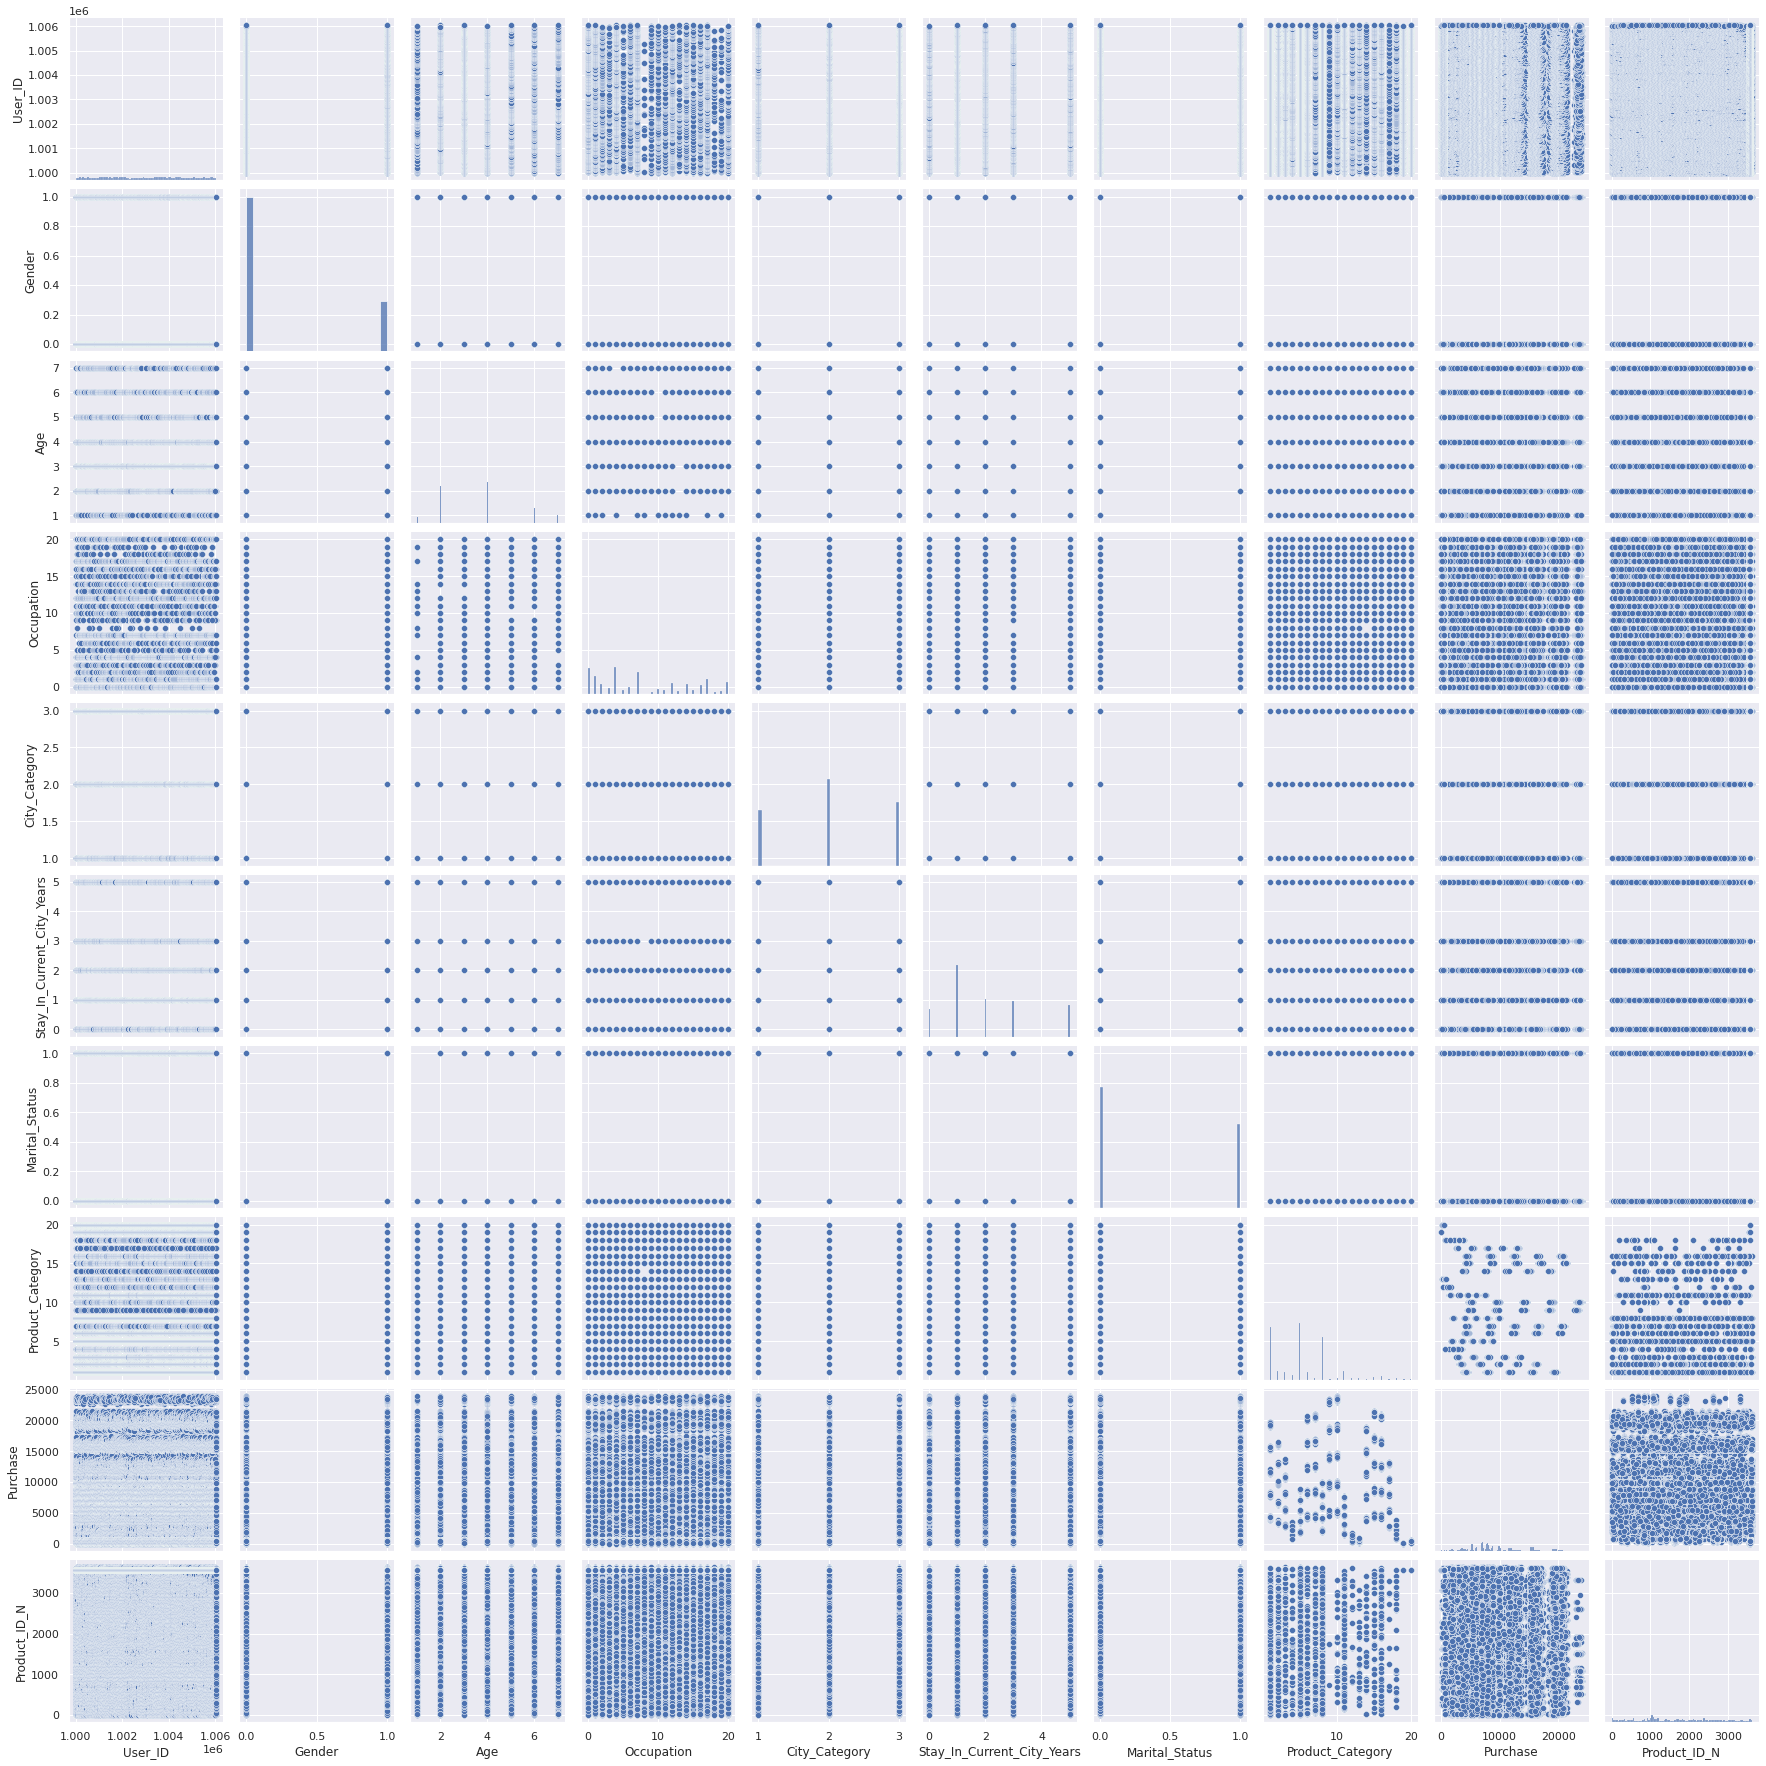

In [131]:
sns.pairplot(dt)

In [132]:
#4 Missing value and outlier detection
dt_n = dt.isnull()

In [133]:
dt_n.value_counts()

User_ID  Product_ID  Gender  Age    Occupation  City_Category  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  Product_ID_N
False    False       False   False  False       False          False                       False           False             False     False           550068
dtype: int64

In [134]:
#For outlier detection IQR can be used
#The comments for outlier detection are made in the text uploaded
dt.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Product_ID_N
count,5.500680e+05,550068,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
unique,NaN,3631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,0.246895,3.496430,8.076707,2.042640,2.012446,0.409653,5.404270,9263.968713,1707.473323
std,1.727592e+03,NaN,0.431205,1.353632,6.522660,0.760211,1.566108,0.491770,3.936211,5023.065394,1012.201109
min,1.000001e+06,NaN,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,12.000000,0.000000
25%,1.001516e+06,NaN,0.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,5823.000000,930.000000
50%,1.003077e+06,NaN,0.000000,3.000000,7.000000,2.000000,2.000000,0.000000,5.000000,8047.000000,1666.000000
75%,1.004478e+06,NaN,0.000000,4.000000,14.000000,3.000000,3.000000,1.000000,8.000000,12054.000000,2550.000000


In [135]:
dt.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
Product_ID_N                   3631
dtype: int64

In [136]:
#Women spending more money per transaction than men

In [137]:
dgt = dt.groupby(by = ['Gender'])

In [138]:
dgt.count()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Product_ID_N
Gender,,,,,,,,,,
0,414259,414259,414259,414259,414259,414259,414259,414259,414259,414259
1,135809,135809,135809,135809,135809,135809,135809,135809,135809,135809


In [139]:
dgt_m = dgt.mean()

In [140]:
dgt_s = dgt.std()

In [141]:
dgt_s

,User_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Product_ID_N
Gender,,,,,,,,,
0,1706.493873,1.343220,6.553790,0.761462,1.582518,0.491159,4.006275,5092.186210,1009.474732
1,1786.630589,1.384862,6.239639,0.756354,1.513861,0.493498,3.696752,4767.233289,1019.960971


In [142]:
#standard deviation for males in purchase
m_st = dgt_s.loc[0]['Purchase']
#standard deviation for females in purchase
f_st = dgt_s.loc[1]['Purchase']

In [143]:
dgt_m

,User_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Product_ID_N
Gender,,,,,,,,,
0,1.002996e+06,3.493126,8.51475,2.040675,2.028876,0.406386,5.301512,9437.526040,1716.697276
1,1.003130e+06,3.506505,6.74054,2.048634,1.962329,0.419619,5.717714,8734.565765,1679.337444


In [144]:
#Mean for males
m_mean = dgt_m.loc[0]['Purchase']

In [146]:
#function to define margin of error
def m_e(z, st, n):
  res = (z * st) / n**(1/2)
  return res

In [148]:
def C_I(mean, mi):
  u1 = round(mean-mi, 2)
  v1 = round(mean+mi, 2)
  res = [u1, v1]
  return res

In [149]:
z = [1, 1.96, 2.57]
#For males we calculate Confidence Intervals
#the margin errors based on
mem1 = m_e(z[0], m_st, 414259)
mem2 = m_e(z[1], m_st, 414259)
mem3 = m_e(z[2], m_st, 414259)

In [150]:
#The confidence intervals for males
mci1 = C_I(m_mean, mem1)

In [151]:
mci2 = C_I(m_mean, mem2)

In [152]:
mci3 = C_I(m_mean, mem3)

In [153]:
res_cim = [mci1, mci2, mci3]

In [154]:
#Mean for females
f_mean = dgt_m.loc[1]['Purchase']

In [155]:
#f_st = dgt_s.loc[0]['Purchase']
f_mean

8734.565765155476

In [156]:
#For females we calcualte Confidence Intervals
#the margin errors based on
memf1 = m_e(z[0], f_st, 135809)
memf2 = m_e(z[1], f_st, 135809)
memf3 = m_e(z[2], f_st, 135809)

In [157]:
#The confidence intervals for females
fci1 = C_I(f_mean, memf1)

In [158]:
fci2 = C_I(f_mean, memf2)

In [159]:
fci3 = C_I(f_mean, memf3)

In [160]:
print(fci1,fci2,fci3)

[8721.63, 8747.5] [8709.21, 8759.92] [8701.32, 8767.81]


In [161]:
res_cif = [fci1, fci2, fci3]

In [162]:
print(f"Purchase confidence interval for men {res_cim}")

Purchase confidence interval for men [[9429.61, 9445.44], [9422.02, 9453.03], [9417.19, 9457.86]]


In [163]:
print(f"Purchase confidence interval for women {res_cif}")

Purchase confidence interval for women [[8721.63, 8747.5], [8709.21, 8759.92], [8701.32, 8767.81]]


In [164]:
#Results when the same activity is performed for Married vs Unmarried
dgg = dt.groupby(by = ['Marital_Status'])

In [165]:
dgg.count()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category,Purchase,Product_ID_N
Marital_Status,,,,,,,,,,
0,324731,324731,324731,324731,324731,324731,324731,324731,324731,324731
1,225337,225337,225337,225337,225337,225337,225337,225337,225337,225337


In [166]:
dgg_m = dgg.mean()
dgg_s = dgg.std()

In [167]:
dgg_m

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category,Purchase,Product_ID_N
Marital_Status,,,,,,,,,
0,1.002999e+06,0.242727,3.144914,7.944782,2.017442,2.028254,5.339059,9265.907619,1697.674472
1,1.003071e+06,0.252901,4.002996,8.266823,2.078953,1.989664,5.498245,9261.174574,1721.594354


In [168]:
dgg_s

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category,Purchase,Product_ID_N
Marital_Status,,,,,,,,,
0,1700.465995,0.428732,1.206829,6.402753,0.760703,1.573340,3.912070,5027.347859,1012.49531
1,1765.090842,0.434676,1.392598,6.687118,0.758030,1.555349,3.968868,5016.897378,1011.61230


In [169]:
#standard deviation for 0 unmarried in purchase
stp0 = dgg_s.loc[0]['Purchase']
#standard deviation for 1 married in purchase
stp1 = dgg_s.loc[1]['Purchase']

In [170]:
print(stp0, stp1)

5027.347858674497 5016.897377793019


In [171]:
#Means
mean_0 = dgg_m.loc[0]['Purchase']

In [172]:
mean_1 = dgg_m.loc[1]['Purchase']

In [173]:
print(mean_0, mean_1)

9265.907618921507 9261.174574082374


In [174]:
#For 0 (unmarried) we calculate Confidence Intervals
#the margin errors based on
mem1 = m_e(z[0], stp0, 324731)
mem2 = m_e(z[1], stp0, 324731)
mem3 = m_e(z[2], stp0, 324731)

In [175]:
#The confidence intervals for 0
ci01 = C_I(mean_0, mem1)
ci02 = C_I(mean_0, mem2)
ci03 = C_I(mean_0, mem2)

In [176]:
#For 1 ie married we calcualte Confidence Intervals
mem1 = m_e(z[0], stp1, 225337)
mem2 = m_e(z[1], stp1, 225337)
mem3 = m_e(z[2], stp1, 225337)

In [177]:
#The confidence intervals for 1
ci11 = C_I(mean_1, mem1)
ci12 = C_I(mean_1, mem2)
ci13 = C_I(mean_1, mem2)

In [178]:
res_ci0 = [ci01, ci02, ci03]

In [179]:
res_ci1 = [ci11, ci12, ci13]

In [180]:
print(res_ci0)

[[9257.09, 9274.73], [9248.62, 9283.2], [9248.62, 9283.2]]


In [181]:
print(res_ci1)

[[9250.61, 9271.74], [9240.46, 9281.89], [9240.46, 9281.89]]


In [182]:
#Results when the same activity is performed for Age
dga = dt.groupby(by = ['Age'])

In [183]:
dga_count = dga.count()

In [184]:
dga_m = dga.mean()
dga_s = dga.std()

In [185]:
dga_m

,User_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Product_ID_N
Age,,,,,,,,,
1,1.002722e+06,0.336578,8.761025,2.303205,1.892465,0.000000,5.083764,8933.464640,1736.110449
2,1.002801e+06,0.247120,6.736384,2.013476,1.982611,0.211880,5.111088,9169.663606,1674.671393
3,1.003113e+06,0.231125,7.896975,1.911256,2.053837,0.392970,5.314272,9252.690633,1688.395529
4,1.003066e+06,0.246971,8.837365,2.083454,2.027460,0.396644,5.494242,9331.350695,1732.619227
5,1.003190e+06,0.288812,8.517078,2.220586,1.917617,0.722326,5.742194,9208.625697,1740.666462
6,1.002985e+06,0.256980,8.810109,2.222384,1.931976,0.718475,5.774214,9534.808031,1745.941222
7,1.002986e+06,0.236375,9.502697,2.427641,2.081101,0.633417,6.066313,9336.280459,1766.132626


In [186]:
dga_s

,User_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Product_ID_N
Age,,,,,,,,,
1,1776.554949,0.472555,4.500672,0.740417,1.437927,0.000000,3.800040,5111.114046,1026.815816
2,1732.153875,0.431339,5.947651,0.752249,1.612313,0.408643,3.810009,5034.321997,1021.422602
3,1732.500251,0.421553,6.694999,0.758323,1.572293,0.488411,3.886768,5010.527303,1009.529387
4,1689.592749,0.431252,6.589059,0.748587,1.508777,0.489203,3.988229,5022.923879,1006.029423
5,1777.321193,0.453215,6.676416,0.710522,1.586188,0.447857,4.047325,4967.216367,1008.594772
6,1680.562531,0.436974,6.669887,0.699832,1.559078,0.449749,4.107277,5087.368080,1009.480190
7,1659.540611,0.424865,6.370448,0.759672,1.607292,0.481882,4.091461,5011.493996,1019.936953


In [188]:
#standard deviation for all age groups
stpa = []
for i in range(1,8):
  stpa.append( dga_s.loc[i]['Purchase'])

In [189]:
stpa

[5111.114046002767,
 5034.321997176603,
 5010.527303002968,
 5022.923879204642,
 4967.216367142973,
 5087.368079602149,
 5011.493995603465]

In [191]:
meana = []
for i in range(1,8):
  meana.append( dga_m.loc[i]['Purchase'])

In [192]:
meana

[8933.464640444974,
 9169.663606261289,
 9252.690632869888,
 9331.350694917874,
 9208.625697468327,
 9534.808030960236,
 9336.280459449405]

In [193]:
dga_count

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Product_ID_N
Age,,,,,,,,,,
1,15102,15102,15102,15102,15102,15102,15102,15102,15102,15102
2,99660,99660,99660,99660,99660,99660,99660,99660,99660,99660
3,219587,219587,219587,219587,219587,219587,219587,219587,219587,219587
4,110013,110013,110013,110013,110013,110013,110013,110013,110013,110013
5,45701,45701,45701,45701,45701,45701,45701,45701,45701,45701
6,38501,38501,38501,38501,38501,38501,38501,38501,38501,38501
7,21504,21504,21504,21504,21504,21504,21504,21504,21504,21504


In [194]:
#We create a list of list which will store the margin errors for each age group
Margin_res = []
for i in range(1,8):
  res = []
  mem1 = m_e(z[0], stpa[i-1], dga_count.loc[i]['Purchase'])
  mem2 = m_e(z[1], stpa[i-1], dga_count.loc[i]['Purchase'])
  mem3 = m_e(z[2], stpa[i-1], dga_count.loc[i]['Purchase'])
  res = [mem1, mem2, mem3]
  Margin_res.append(res)

In [195]:
Margin_res

[[41.59090194783284, 81.51816781775237, 106.8886180059304],
 [15.947057065532084, 31.256231848442887, 40.983936658417456],
 [10.692521207106077, 20.95734156592791, 27.479779502262616],
 [15.143790491397754, 29.681829363139595, 38.91954156289223],
 [23.235403904762894, 45.541391653335275, 59.71498803524064],
 [25.92729181989749, 50.81749196699907, 66.63313997713655],
 [34.17492645784162, 66.98285585736959, 87.82956099665296]]

In [197]:
#A list which stores the cofidence intervals for all age groups
CI_res = []
for i in range(1,8):
  res = []
  ci1 = C_I(meana[i-1], Margin_res[i-1][0])
  ci2 = C_I(meana[i-1], Margin_res[i-1][1])
  ci3 = C_I(meana[i-1], Margin_res[i-1][2])
  res = [ci11, ci2, ci3]
  CI_res.append(res)

In [198]:
#despite having different means and standard deviations the first CI is the same
CI_res

[[[9250.61, 9271.74], [8851.95, 9014.98], [8826.58, 9040.35]],
 [[9250.61, 9271.74], [9138.41, 9200.92], [9128.68, 9210.65]],
 [[9250.61, 9271.74], [9231.73, 9273.65], [9225.21, 9280.17]],
 [[9250.61, 9271.74], [9301.67, 9361.03], [9292.43, 9370.27]],
 [[9250.61, 9271.74], [9163.08, 9254.17], [9148.91, 9268.34]],
 [[9250.61, 9271.74], [9483.99, 9585.63], [9468.17, 9601.44]],
 [[9250.61, 9271.74], [9269.3, 9403.26], [9248.45, 9424.11]]]